In [1]:
%pip install pandas
%pip install matplotlib


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#switch the years to analyze different years

data = pd.read_csv('c:/Users/estifo/Downloads/gamma-capture-project/data/DAT_ASCII_EURUSD_M1_2010.csv', header=None, sep=';')

In [4]:

import pandas as pd
import os

# Define the file path pattern (adjust if needed)
base_path = 'c:/Users/estifo/Downloads/gamma-capture-project/data/'

# List to store DataFrames
data_frames = []

# Loop through years 2010 to 2021
for year in range(2000, 2022):
    file_path = os.path.join(base_path, f'DAT_ASCII_EURUSD_M1_{year}.csv')
    
    # Read CSV file (adjust parameters if needed)
    df = pd.read_csv(file_path, header=None, sep=';')
    
    # Append to list
    data_frames.append(df)

# Concatenate all DataFrames into one
data = pd.concat(data_frames, ignore_index=True)

# Display first few rows to confirm
print(data.head())


                 0       1       2       3       4  5
0  20000530 172700  0.9302  0.9302  0.9302  0.9302  0
1  20000530 173500  0.9304  0.9305  0.9304  0.9305  0
2  20000530 173800  0.9304  0.9304  0.9303  0.9303  0
3  20000530 174300  0.9301  0.9301  0.9300  0.9300  0
4  20000530 174400  0.9298  0.9298  0.9297  0.9297  0


In [5]:
data.tail()

,0,1,2,3,4,5
7280970,20211231 165400,1.13797,1.13797,1.13774,1.13774,0
7280971,20211231 165500,1.13775,1.13781,1.13748,1.13748,0
7280972,20211231 165600,1.13749,1.13765,1.13704,1.13707,0
7280973,20211231 165700,1.13709,1.13740,1.13679,1.13740,0
7280974,20211231 165800,1.13740,1.13740,1.13681,1.13686,0


In [6]:
data.shape

(7280975, 6)

In [7]:
# Rename columns for clarity
data.columns = ['DateTime', 'Open', 'High', 'Low', 'Close', 'Volume']

In [8]:
data.tail(4)

,DateTime,Open,High,Low,Close,Volume
7280971,20211231 165500,1.13775,1.13781,1.13748,1.13748,0
7280972,20211231 165600,1.13749,1.13765,1.13704,1.13707,0
7280973,20211231 165700,1.13709,1.13740,1.13679,1.13740,0
7280974,20211231 165800,1.13740,1.13740,1.13681,1.13686,0


In [9]:
data.iloc[:10]

,DateTime,Open,High,Low,Close,Volume
0,20000530 172700,0.9302,0.9302,0.9302,0.9302,0
1,20000530 173500,0.9304,0.9305,0.9304,0.9305,0
2,20000530 173800,0.9304,0.9304,0.9303,0.9303,0
3,20000530 174300,0.9301,0.9301,0.9300,0.9300,0
4,20000530 174400,0.9298,0.9298,0.9297,0.9297,0
5,20000530 182900,0.9298,0.9299,0.9298,0.9299,0
6,20000530 183700,0.9300,0.9300,0.9300,0.9300,0
7,20000530 184000,0.9299,0.9299,0.9299,0.9299,0
8,20000530 184100,0.9300,0.9300,0.9300,0.9300,0
9,20000530 184200,0.9299,0.9299,0.9298,0.9299,0


In [10]:
# Convert 'DateTime' to datetime format
data['DateTime'] = pd.to_datetime(data['DateTime'], format='%Y%m%d %H%M%S')

In [11]:
# Identify duplicate rows based on the 'DateTime' column
duplicates = data[data.duplicated(subset=['DateTime'], keep=False)]

# Get the indices of duplicate rows
duplicate_indices = duplicates.index.tolist()
print("Indices of Duplicate Rows (Based on DateTime Column):")
print(duplicate_indices)

Indices of Duplicate Rows (Based on DateTime Column):
[6472566, 6472567, 6472568, 6472569, 6472570, 6472571, 6472572, 6472573, 6472574, 6472575, 6472576, 6472577, 6472578, 6472579, 6472580, 6472581, 6472582, 6472583, 6472584, 6472585, 6472586, 6472587, 6472588, 6472589, 6472590, 6472591, 6472592, 6472593, 6472594, 6472595, 6472596, 6472597, 6472598, 6472599, 6472600, 6472601, 6472602, 6472603, 6472604, 6472605, 6472606, 6472607, 6472608, 6472609, 6472610, 6472611, 6472612, 6472613, 6472614, 6472615, 6472616, 6472617, 6472618, 6472619, 6472620, 6472621, 6472622, 6472623, 6472624, 6472625, 6472626, 6472627, 6472628, 6472629, 6472630, 6472631, 6472632, 6472633, 6472634, 6472635, 6472636, 6472637, 6472638, 6472639, 6472640, 6472641, 6472642, 6472643, 6472644, 6472645, 6472646, 6472647, 6472648, 6472649, 6472650, 6472651, 6472652, 6472653, 6472654, 6472655, 6472656, 6472657, 6472658, 6472659, 6472660, 6472661, 6472662, 6472663, 6472664, 6472665, 6472666, 6472667, 6472668, 6472669, 6472670, 

In [12]:
# Could not see any duplicated row
data.iloc[308461:308480]

,DateTime,Open,High,Low,Close,Volume
308461,2001-08-20 09:09:00,0.9154,0.9157,0.9152,0.9154,0
308462,2001-08-20 09:10:00,0.9153,0.9153,0.9152,0.9153,0
308463,2001-08-20 09:11:00,0.9154,0.9156,0.9154,0.9156,0
308464,2001-08-20 09:12:00,0.9155,0.9156,0.9154,0.9156,0
308465,2001-08-20 09:13:00,0.9155,0.9155,0.9154,0.9154,0
308466,2001-08-20 09:14:00,0.9153,0.9155,0.9153,0.9155,0
308467,2001-08-20 09:15:00,0.9154,0.9154,0.9154,0.9154,0
308468,2001-08-20 09:16:00,0.9155,0.9155,0.9155,0.9155,0
308469,2001-08-20 09:17:00,0.9154,0.9155,0.9154,0.9155,0
308470,2001-08-20 09:18:00,0.9154,0.9155,0.9154,0.9155,0


In [13]:
data.tail()

,DateTime,Open,High,Low,Close,Volume
7280970,2021-12-31 16:54:00,1.13797,1.13797,1.13774,1.13774,0
7280971,2021-12-31 16:55:00,1.13775,1.13781,1.13748,1.13748,0
7280972,2021-12-31 16:56:00,1.13749,1.13765,1.13704,1.13707,0
7280973,2021-12-31 16:57:00,1.13709,1.13740,1.13679,1.13740,0
7280974,2021-12-31 16:58:00,1.13740,1.13740,1.13681,1.13686,0


In [14]:
data.shape

(7280975, 6)

In [15]:
data.set_index('DateTime', inplace=True)

In [16]:
data

,Open,High,Low,Close,Volume
DateTime,,,,,
2000-05-30 17:27:00,0.93020,0.93020,0.93020,0.93020,0
2000-05-30 17:35:00,0.93040,0.93050,0.93040,0.93050,0
2000-05-30 17:38:00,0.93040,0.93040,0.93030,0.93030,0
2000-05-30 17:43:00,0.93010,0.93010,0.93000,0.93000,0
2000-05-30 17:44:00,0.92980,0.92980,0.92970,0.92970,0
...,...,...,...,...,...
2021-12-31 16:54:00,1.13797,1.13797,1.13774,1.13774,0
2021-12-31 16:55:00,1.13775,1.13781,1.13748,1.13748,0
2021-12-31 16:56:00,1.13749,1.13765,1.13704,1.13707,0


In [17]:
# Ensure 'DateTime' is the index
data.index = pd.to_datetime(data.index)

# Generate a full range of 1-minute timestamps
full_range = pd.date_range(start=data.index.min(), end=data.index.max(), freq='1T')


C:\Users\estifo\AppData\Local\Temp\ipykernel_21576\14682924.py:5: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  full_range = pd.date_range(start=data.index.min(), end=data.index.max(), freq='1T')


In [18]:
# Find missing timestamps
missing_timestamps = full_range.difference(data.index)

# Display missing timestamps
print(f"Missing Timestamps:\n{missing_timestamps}")


Missing Timestamps:
DatetimeIndex(['2000-05-30 17:28:00', '2000-05-30 17:29:00',
               '2000-05-30 17:30:00', '2000-05-30 17:31:00',
               '2000-05-30 17:32:00', '2000-05-30 17:33:00',
               '2000-05-30 17:34:00', '2000-05-30 17:36:00',
               '2000-05-30 17:37:00', '2000-05-30 17:39:00',
               ...
               '2021-12-30 23:48:00', '2021-12-31 00:25:00',
               '2021-12-31 00:43:00', '2021-12-31 00:48:00',
               '2021-12-31 00:52:00', '2021-12-31 01:58:00',
               '2021-12-31 02:17:00', '2021-12-31 13:43:00',
               '2021-12-31 14:07:00', '2021-12-31 14:36:00'],
              dtype='datetime64[ns]', length=4073577, freq=None)


In [19]:
data.iloc[35:45]

,Open,High,Low,Close,Volume
DateTime,,,,,
2000-05-30 19:32:00,0.9296,0.9296,0.9296,0.9296,0
2000-05-30 19:33:00,0.9297,0.9297,0.9297,0.9297,0
2000-05-30 19:34:00,0.9296,0.9296,0.9296,0.9296,0
2000-05-30 19:35:00,0.9295,0.9295,0.9295,0.9295,0
2000-05-30 19:36:00,0.9294,0.9294,0.9293,0.9294,0
2000-05-30 19:37:00,0.9293,0.9294,0.9293,0.9293,0
2000-05-30 19:39:00,0.9294,0.9294,0.9294,0.9294,0
2000-05-30 19:42:00,0.9295,0.9295,0.9294,0.9294,0
2000-05-30 19:44:00,0.9295,0.9295,0.9295,0.9295,0


In [20]:
data.iloc[50:60]

,Open,High,Low,Close,Volume
DateTime,,,,,
2000-05-30 19:56:00,0.9297,0.9297,0.9297,0.9297,0
2000-05-30 19:57:00,0.9296,0.9296,0.9295,0.9295,0
2000-05-30 19:58:00,0.9297,0.9299,0.9297,0.9298,0
2000-05-30 19:59:00,0.9299,0.9305,0.9299,0.9305,0
2000-05-30 20:00:00,0.9306,0.9307,0.9306,0.9307,0
2000-05-30 20:01:00,0.9308,0.9308,0.9307,0.9308,0
2000-05-30 20:03:00,0.9307,0.9309,0.9307,0.9309,0
2000-05-30 20:05:00,0.9310,0.9311,0.9310,0.9311,0
2000-05-30 20:06:00,0.9312,0.9312,0.9311,0.9311,0


In [21]:
missing_timestamps.shape

(4073577,)

In [22]:
# Convert missing timestamps to a DataFrame
missing_df = pd.DataFrame(missing_timestamps, columns=['DateTime'])

In [23]:
missing_df['indicator'] = 1
missing_df

,DateTime,indicator
0,2000-05-30 17:28:00,1
1,2000-05-30 17:29:00,1
2,2000-05-30 17:30:00,1
3,2000-05-30 17:31:00,1
4,2000-05-30 17:32:00,1
...,...,...
4073572,2021-12-31 01:58:00,1
4073573,2021-12-31 02:17:00,1
4073574,2021-12-31 13:43:00,1
4073575,2021-12-31 14:07:00,1


In [24]:
# Generate a complete time range with 1-minute frequency
# Instead of data['DateTime'], use data.index to access the DateTime values
full_range = pd.date_range(start=data.index.min(), end=data.index.max(), freq='T')

C:\Users\estifo\AppData\Local\Temp\ipykernel_21576\2015894820.py:3: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  full_range = pd.date_range(start=data.index.min(), end=data.index.max(), freq='T')


In [25]:
# Create a dataframe from the complete time range
complete_df = pd.DataFrame(full_range, columns=['DateTime'])

# Merge the original dataframe with the complete time range
combined_df = pd.merge(complete_df, data, on='DateTime', how='left')

In [26]:
# Merge the missing dataframe with the combined dataframe
combined_df = pd.merge(combined_df, missing_df, on='DateTime', how='left')

In [27]:
combined_df

,DateTime,Open,High,Low,Close,Volume,indicator
0,2000-05-30 17:27:00,0.93020,0.93020,0.93020,0.93020,0.0,NaN
1,2000-05-30 17:28:00,NaN,NaN,NaN,NaN,NaN,1.0
2,2000-05-30 17:29:00,NaN,NaN,NaN,NaN,NaN,1.0
3,2000-05-30 17:30:00,NaN,NaN,NaN,NaN,NaN,1.0
4,2000-05-30 17:31:00,NaN,NaN,NaN,NaN,NaN,1.0
...,...,...,...,...,...,...,...
11354547,2021-12-31 16:54:00,1.13797,1.13797,1.13774,1.13774,0.0,NaN
11354548,2021-12-31 16:55:00,1.13775,1.13781,1.13748,1.13748,0.0,NaN
11354549,2021-12-31 16:56:00,1.13749,1.13765,1.13704,1.13707,0.0,NaN
11354550,2021-12-31 16:57:00,1.13709,1.13740,1.13679,1.13740,0.0,NaN


In [28]:
# Fill the 'indicator' column: 0 for non-missing, 1 for missing
combined_df['indicator'] = combined_df['indicator'].fillna(0).astype(int)

# Sort by DateTime (optional)
combined_df = combined_df.sort_values(by='DateTime').reset_index(drop=True)

In [29]:
combined_df.shape

(11354552, 7)

In [30]:
combined_df.iloc[35:45]

,DateTime,Open,High,Low,Close,Volume,indicator
35,2000-05-30 18:02:00,NaN,NaN,NaN,NaN,NaN,1
36,2000-05-30 18:03:00,NaN,NaN,NaN,NaN,NaN,1
37,2000-05-30 18:04:00,NaN,NaN,NaN,NaN,NaN,1
38,2000-05-30 18:05:00,NaN,NaN,NaN,NaN,NaN,1
39,2000-05-30 18:06:00,NaN,NaN,NaN,NaN,NaN,1
40,2000-05-30 18:07:00,NaN,NaN,NaN,NaN,NaN,1
41,2000-05-30 18:08:00,NaN,NaN,NaN,NaN,NaN,1
42,2000-05-30 18:09:00,NaN,NaN,NaN,NaN,NaN,1
43,2000-05-30 18:10:00,NaN,NaN,NaN,NaN,NaN,1
44,2000-05-30 18:11:00,NaN,NaN,NaN,NaN,NaN,1


In [31]:
combined_df.iloc[50:60]

,DateTime,Open,High,Low,Close,Volume,indicator
50,2000-05-30 18:17:00,NaN,NaN,NaN,NaN,NaN,1
51,2000-05-30 18:18:00,NaN,NaN,NaN,NaN,NaN,1
52,2000-05-30 18:19:00,NaN,NaN,NaN,NaN,NaN,1
53,2000-05-30 18:20:00,NaN,NaN,NaN,NaN,NaN,1
54,2000-05-30 18:21:00,NaN,NaN,NaN,NaN,NaN,1
55,2000-05-30 18:22:00,NaN,NaN,NaN,NaN,NaN,1
56,2000-05-30 18:23:00,NaN,NaN,NaN,NaN,NaN,1
57,2000-05-30 18:24:00,NaN,NaN,NaN,NaN,NaN,1
58,2000-05-30 18:25:00,NaN,NaN,NaN,NaN,NaN,1
59,2000-05-30 18:26:00,NaN,NaN,NaN,NaN,NaN,1


In [32]:
sample = combined_df.iloc[:75]

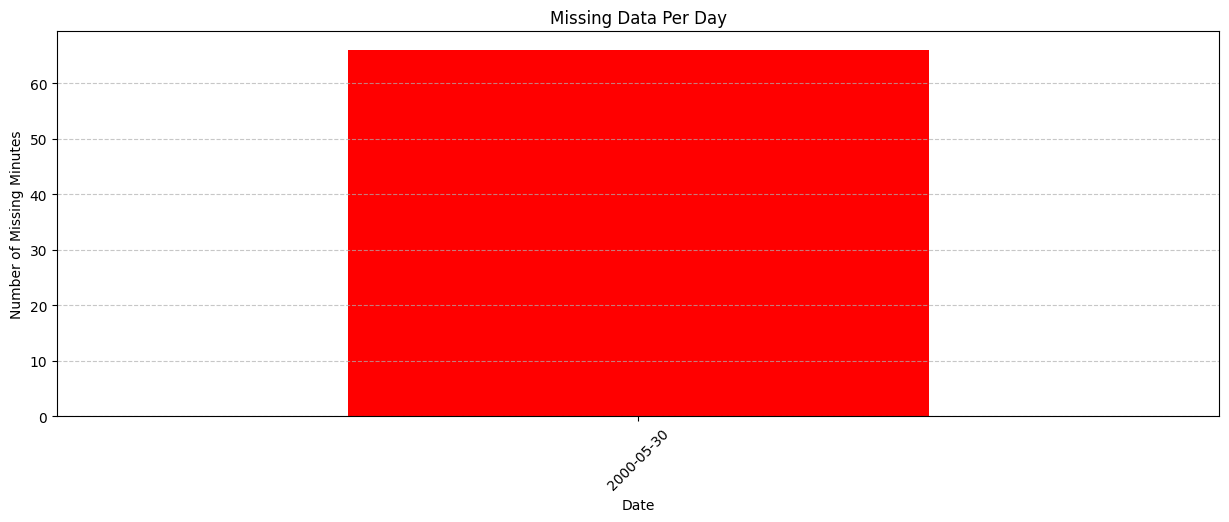

In [33]:
# Group by date and sum the indicator column (missing minutes per day)
missing_per_day = sample.groupby(sample['DateTime'].dt.date)['indicator'].sum()

# Plot the bar chart
plt.figure(figsize=(15, 5))
missing_per_day.plot(kind='bar', color='red')
plt.title('Missing Data Per Day')
plt.xlabel('Date')
plt.ylabel('Number of Missing Minutes')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

KeyboardInterrupt: 

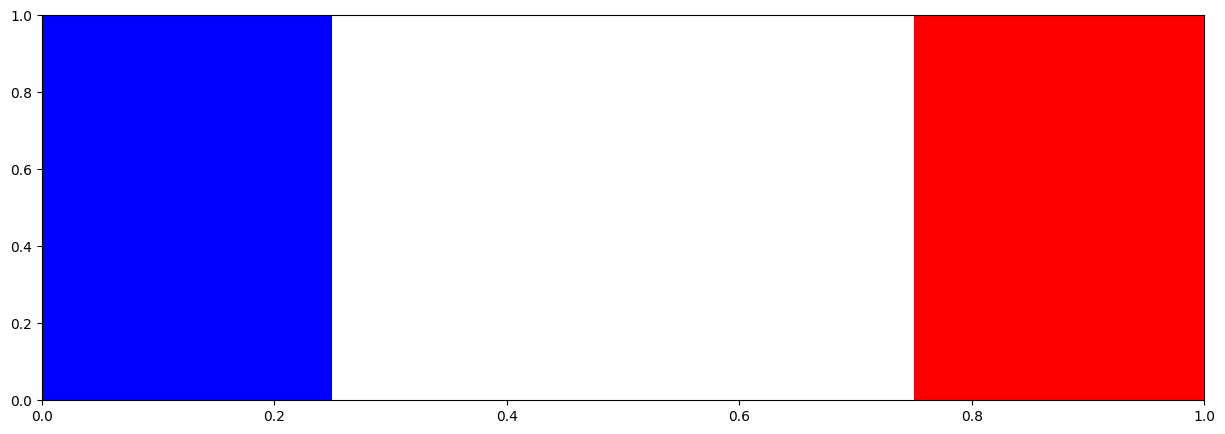

In [34]:
import pandas as pd
import matplotlib.pyplot as plt



# Ensure DateTime is in datetime format
combined_df['DateTime'] = pd.to_datetime(combined_df['DateTime'])

# Step 1: Group by date and sum the indicator column (missing minutes per day)
missing_per_day = combined_df.groupby(combined_df['DateTime'].dt.date)['indicator'].sum()

# Step 2: Identify weekdays (days with less than 400 missing data)
weekdays = missing_per_day[missing_per_day < 400].index

# Step 3: Filter the dataframe to include only weekdays
weekday_df = combined_df[combined_df['DateTime'].dt.date.isin(weekdays)]

# Step 4: Group by hour and sum missing data
missing_per_hour_weekdays = weekday_df.groupby(weekday_df['DateTime'].dt.hour)['indicator'].sum()

# Step 5: Add year-wise grouping for better analysis
missing_per_day_yearly = combined_df.groupby([combined_df['DateTime'].dt.year, combined_df['DateTime'].dt.date])['indicator'].sum()

# --- PLOTS ---

# Plot Step 2: Highlighting weekdays (days with missing data < 400)
plt.figure(figsize=(15, 5))
missing_per_day.plot(kind='bar', color=['blue' if date in weekdays else 'red' for date in missing_per_day.index])
plt.title('Weekdays vs Non-Weekdays Based on Missing Data (All Years)')
plt.xlabel('Date')
plt.ylabel('Number of Missing Minutes')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(['Blue: Weekday (<400 missing)', 'Red: Non-Weekday (>=400 missing)'])
plt.show()

# OPTIONAL: Yearly Breakdown (Missing Data Per Day)
plt.figure(figsize=(15, 6))
for year in sorted(combined_df['DateTime'].dt.year.unique()):
    missing_per_day_yearly.loc[year].plot(label=str(year))
plt.title('Missing Data Per Day (Yearly Comparison)')
plt.xlabel('Date')
plt.ylabel('Missing Data')
plt.xticks(rotation=45)
plt.legend(title="Year")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Plot Step 3: Missing data per weekday across multiple years
plt.figure(figsize=(15, 5))
weekday_missing_data = missing_per_day[weekdays]
weekday_missing_data.plot(kind='bar', color='blue')
plt.title('Missing Data Per Day in Weekdays (All Years)')
plt.xlabel('Date')
plt.ylabel('Missing Data')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Plot Step 4: Missing data per hour on weekdays
plt.figure(figsize=(12, 5))
missing_per_hour_weekdays.plot(kind='bar', color='red')
plt.title('Missing Data Per Hour on Weekdays (All Years)')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Missing Minutes')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [ ]:
missing_per_day

DateTime
2000-05-30     267
2000-05-31     822
2000-06-01     944
2000-06-02    1077
2000-06-03    1440
              ... 
2021-12-27      30
2021-12-28      15
2021-12-29      18
2021-12-30      17
2021-12-31       9
Name: indicator, Length: 7886, dtype: int64

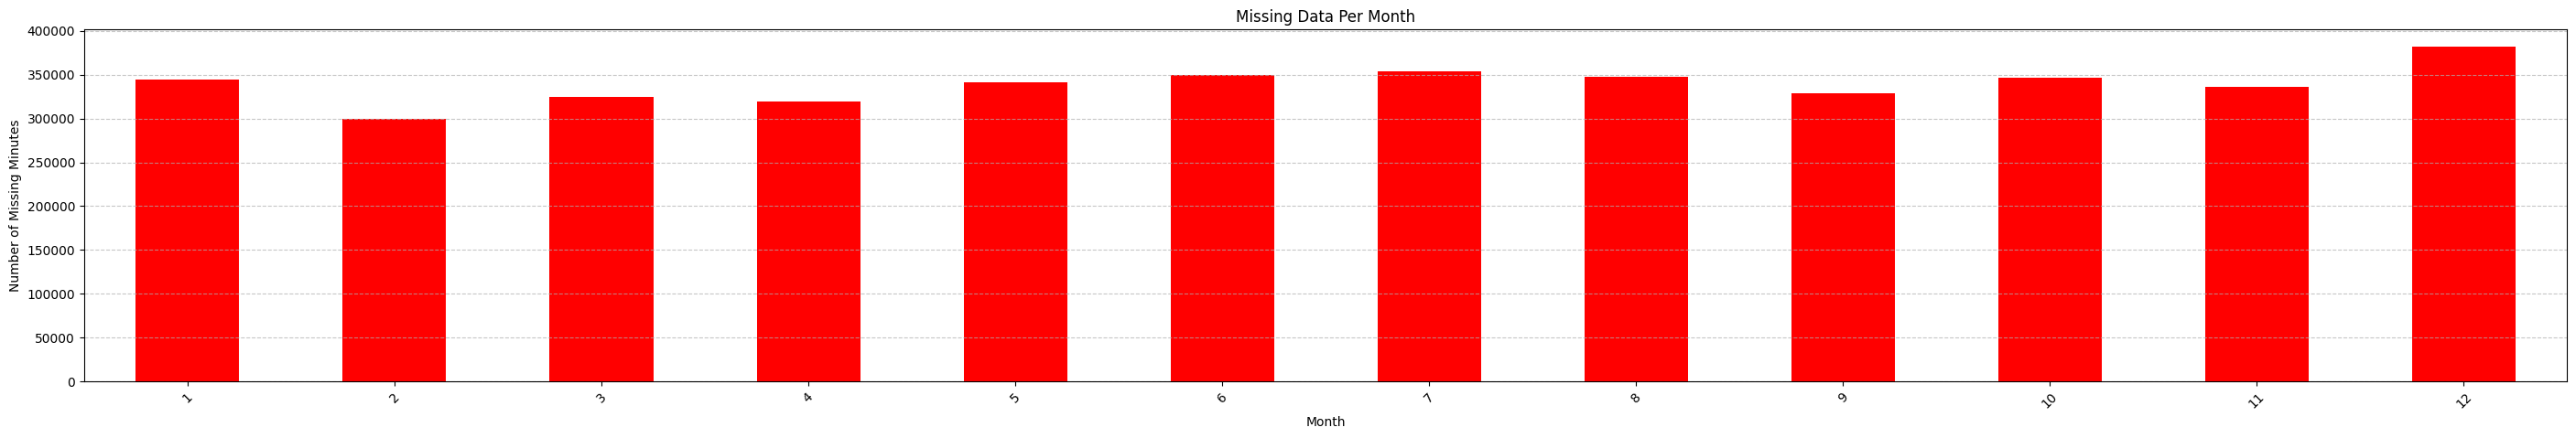

In [ ]:
# Group by month and sum the indicator column (missing minutes per month)
missing_per_month = combined_df.groupby(combined_df['DateTime'].dt.month)['indicator'].sum()

# Plot the bar chart
plt.figure(figsize=(35, 5))
missing_per_month.plot(kind='bar', color='red')
plt.title('Missing Data Per Month')
plt.xlabel('Month')
plt.ylabel('Number of Missing Minutes')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [ ]:
# We expect to have 4 weekends/ mo. Therefore 4*2*24*60 minutes missing per month = 11,520

In [ ]:
print(missing_per_month)

DateTime
1     344618
2     299442
3     324297
4     319527
5     340878
6     349312
7     353369
8     347280
9     329058
10    346928
11    336473
12    382395
Name: indicator, dtype: int64


In [ ]:
sum(missing_per_month)-(11520*12)

3935337

In [ ]:
########  To be certain, we decidd to label any day with more than 400 missing minutes as a weekend day and remove it from the data
########  This includes Fridays as well
weekend_days = missing_per_day[missing_per_day >= 400].index
final_data = combined_df[~combined_df['DateTime'].dt.date.isin(weekend_days)]

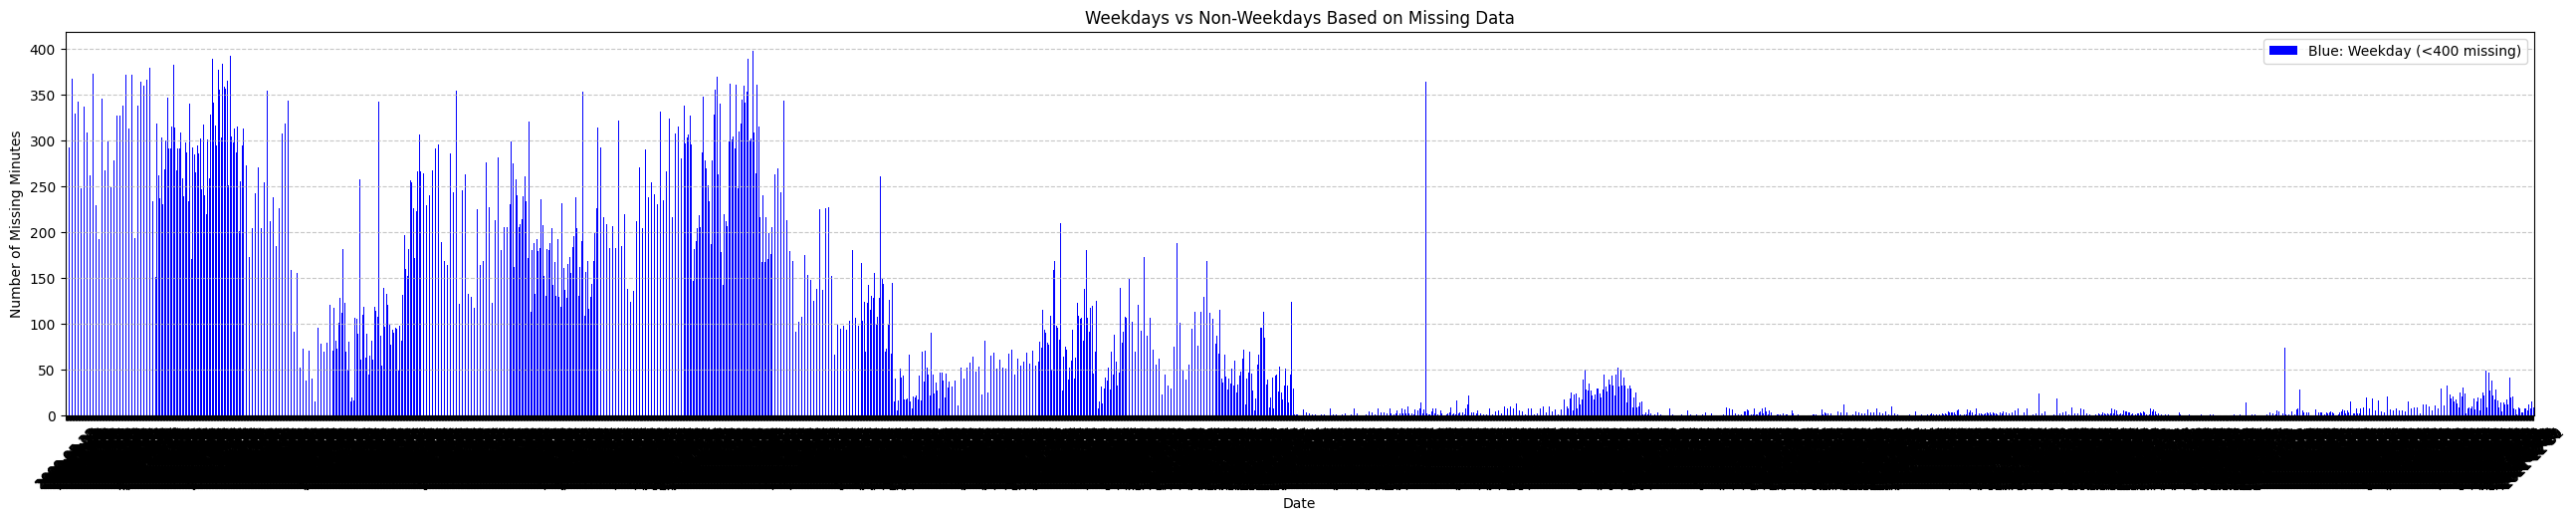

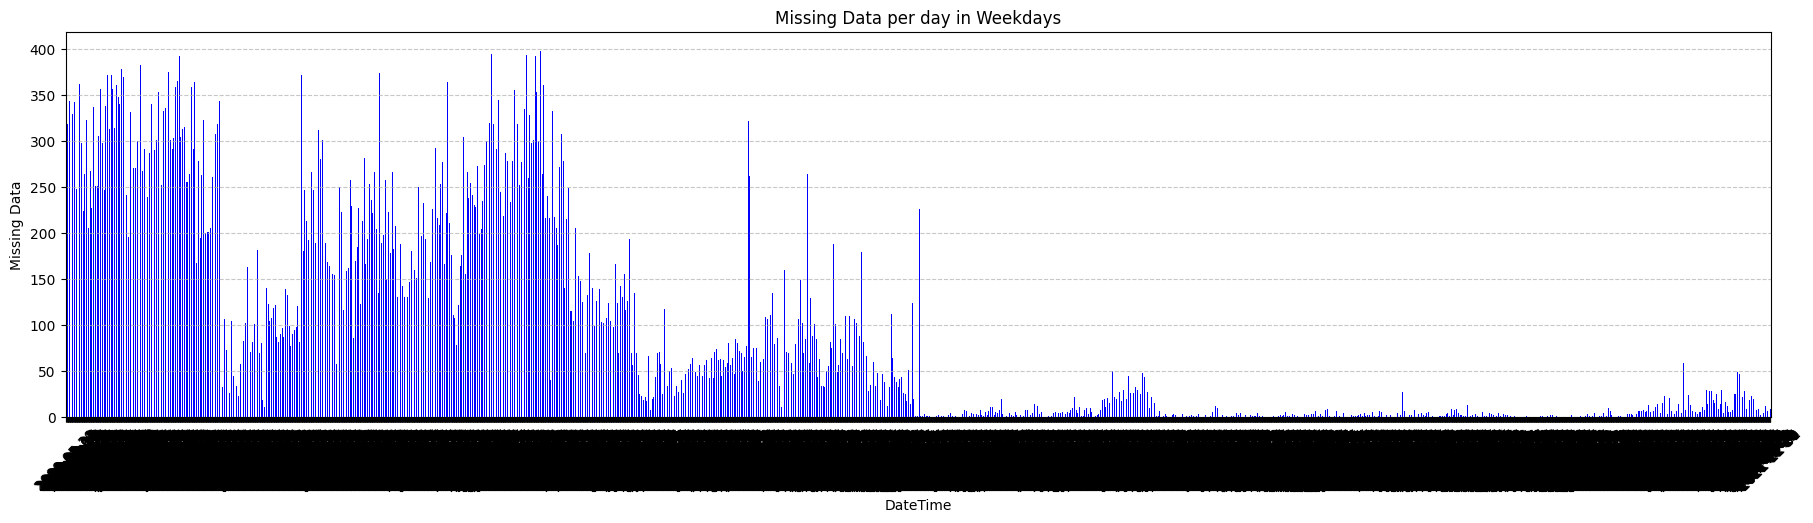

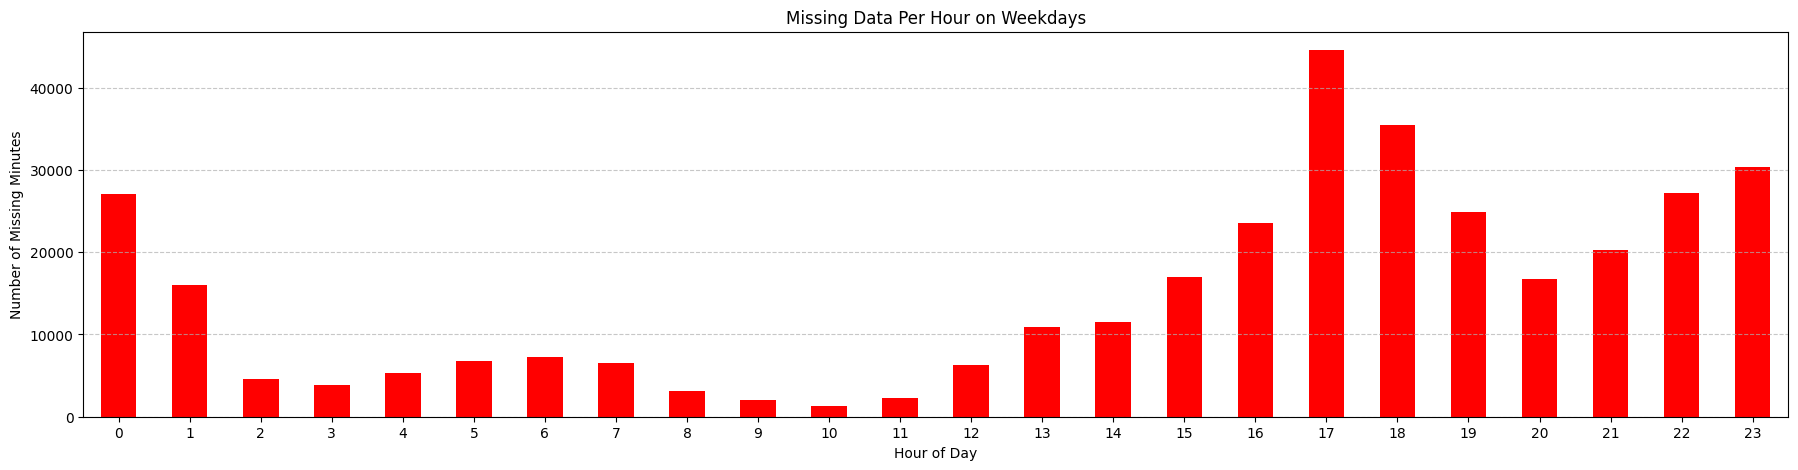

In [ ]:
combined_df = final_data.copy()

# Ensure DateTime is in datetime format
combined_df['DateTime'] = pd.to_datetime(combined_df['DateTime'])

# Step 1: Group by date and sum the indicator column (missing minutes per day)
missing_per_day = combined_df.groupby(combined_df['DateTime'].dt.date)['indicator'].sum()

# Step 2: Identify weekdays (days with less than 400 missing data)
weekdays = missing_per_day[missing_per_day < 400].index

# Step 3: Filter the dataframe to include only weekdays
weekday_df = combined_df[combined_df['DateTime'].dt.date.isin(weekdays)]

# Step 4: Group by hour and sum missing data
missing_per_hour_weekdays = weekday_df.groupby(weekday_df['DateTime'].dt.hour)['indicator'].sum()


# Plot Step 2: Highlighting weekdays (days with missing data < 400)
plt.figure(figsize=(32, 5))
missing_per_day.plot(kind='bar', color=['blue' if date in weekdays else 'red' for date in missing_per_day.index])
plt.title('Weekdays vs Non-Weekdays Based on Missing Data')
plt.xlabel('Date')
plt.ylabel('Number of Missing Minutes')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(['Blue: Weekday (<400 missing)', 'Red: Non-Weekday (>=400 missing)'])
plt.show()

# Plot Step 3: Data points in weekdays
plt.figure(figsize=(22, 5))
weekday_missing_data = pd.Series(missing_per_day[weekdays], index=weekdays) 
weekday_missing_data.plot(kind='bar', color=['blue'])
plt.title('Missing Data per day in Weekdays')
plt.xlabel('DateTime')
plt.ylabel('Missing Data')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Plot Step 4: Missing data per hour on weekdays
plt.figure(figsize=(22, 5))
missing_per_hour_weekdays.plot(kind='bar', color='red')
plt.title('Missing Data Per Hour on Weekdays')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Missing Minutes')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [ ]:
dup_consecutive = combined_df[['Open', 'High', 'Low', 'Close']].eq(combined_df[['Open', 'High', 'Low', 'Close']].shift(-1)).all(axis=1) | \
                  combined_df[['Open', 'High', 'Low', 'Close']].eq(combined_df[['Open', 'High', 'Low', 'Close']].shift(1)).all(axis=1)
dup_df= combined_df[dup_consecutive]
dup_df
# Tanyar screenshot
#dup_df.loc[pd.to_datetime('2023-01-03 17:03:00'):pd.to_datetime('2023-01-03 17:48:00'), :]

,DateTime,Open,High,Low,Close,Volume,indicator
110,2000-05-30 19:17:00,0.92980,0.92990,0.92980,0.92990,0.0,0
111,2000-05-30 19:18:00,0.92980,0.92990,0.92980,0.92990,0.0,0
120122,2000-08-22 03:29:00,0.90220,0.90220,0.90210,0.90210,0.0,0
120123,2000-08-22 03:30:00,0.90220,0.90220,0.90210,0.90210,0.0,0
120131,2000-08-22 03:38:00,0.90230,0.90240,0.90230,0.90240,0.0,0
...,...,...,...,...,...,...,...
11353333,2021-12-30 20:40:00,1.13238,1.13238,1.13237,1.13237,0.0,0
11353374,2021-12-30 21:21:00,1.13193,1.13193,1.13193,1.13193,0.0,0
11353375,2021-12-30 21:22:00,1.13193,1.13193,1.13193,1.13193,0.0,0
11354392,2021-12-31 14:19:00,1.13847,1.13851,1.13847,1.13851,0.0,0


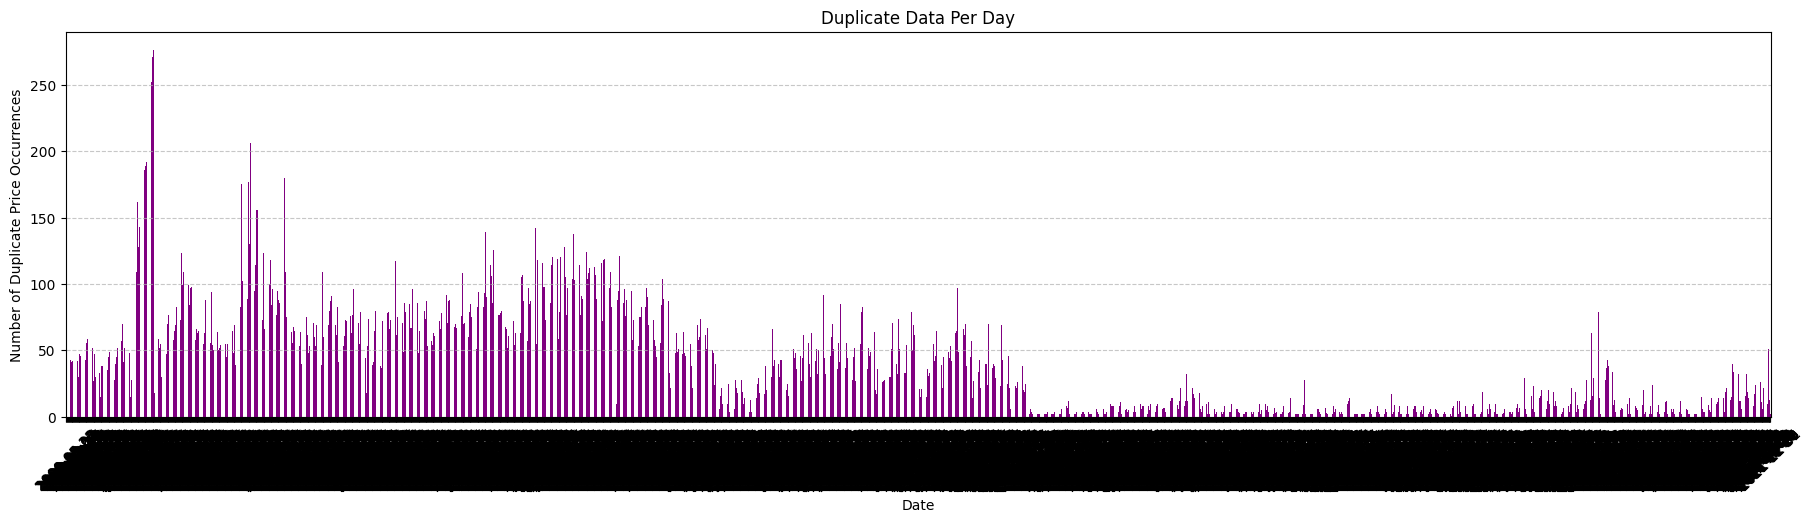

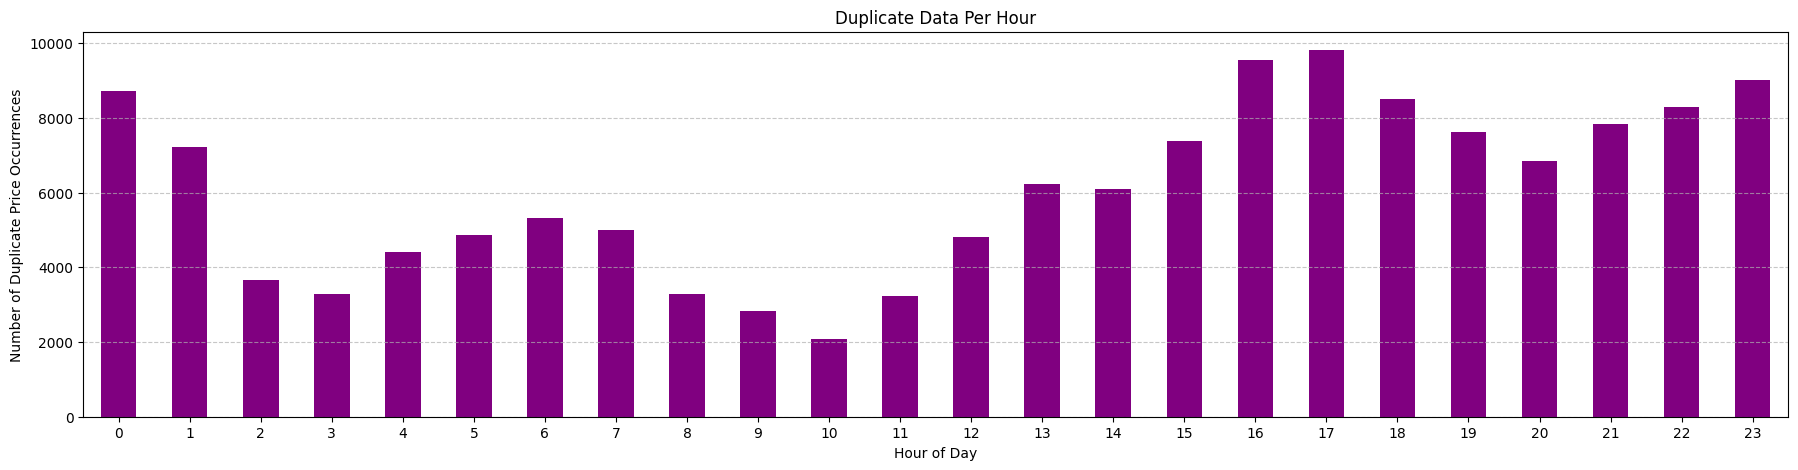

In [ ]:
# Ensure DateTime is in datetime format
combined_df['DateTime'] = pd.to_datetime(combined_df['DateTime'])

# Identify duplicated consecutive OHLC prices
dup_consecutive = combined_df[['Open', 'High', 'Low', 'Close']].eq(combined_df[['Open', 'High', 'Low', 'Close']].shift(-1)).all(axis=1) | \
                  combined_df[['Open', 'High', 'Low', 'Close']].eq(combined_df[['Open', 'High', 'Low', 'Close']].shift(1)).all(axis=1)

dup_df = combined_df[dup_consecutive]

# Group duplicate occurrences by date
dup_per_day = dup_df.groupby(dup_df['DateTime'].dt.date).size()

#  Group by hour and count occurrences of duplicate data
dup_per_hour = dup_df.groupby(dup_df['DateTime'].dt.hour).size()

# Plot duplicate occurrences per day
plt.figure(figsize=(22, 5))
dup_per_day.plot(kind='bar', color='purple')
plt.title('Duplicate Data Per Day')
plt.xlabel('Date')
plt.ylabel('Number of Duplicate Price Occurrences')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Plot the bar chart for duplicate data occurrences per hour
plt.figure(figsize=(22, 5))
dup_per_hour.plot(kind='bar', color='purple')
plt.title('Duplicate Data Per Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Duplicate Price Occurrences')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()




In [ ]:
60*5*4*12   # if we assume we have an entire hour of duplicates over a year

14400

In [ ]:
# Remove weekend data (Friday = 4, Saturday = 5, Sunday = 6)
combined_weekend_df = combined_df[combined_df['DateTime'].dt.weekday < 4]
combined_weekend_df

,DateTime,Open,High,Low,Close,Volume,indicator
0,2000-05-30 17:27:00,0.93020,0.93020,0.93020,0.93020,0.0,0
1,2000-05-30 17:28:00,NaN,NaN,NaN,NaN,NaN,1
2,2000-05-30 17:29:00,NaN,NaN,NaN,NaN,NaN,1
3,2000-05-30 17:30:00,NaN,NaN,NaN,NaN,NaN,1
4,2000-05-30 17:31:00,NaN,NaN,NaN,NaN,NaN,1
...,...,...,...,...,...,...,...
11353528,2021-12-30 23:55:00,1.13174,1.13174,1.13169,1.13169,0.0,0
11353529,2021-12-30 23:56:00,1.13170,1.13173,1.13170,1.13173,0.0,0
11353530,2021-12-30 23:57:00,1.13174,1.13174,1.13174,1.13174,0.0,0
11353531,2021-12-30 23:58:00,1.13173,1.13176,1.13173,1.13176,0.0,0


In [ ]:
# Remove duplicated OHLC data
combined_df_clean = combined_weekend_df[~dup_consecutive]
combined_df_clean

C:\Users\estifo\AppData\Local\Temp\ipykernel_17368\2055765388.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  combined_df_clean = combined_weekend_df[~dup_consecutive]


,DateTime,Open,High,Low,Close,Volume,indicator
0,2000-05-30 17:27:00,0.93020,0.93020,0.93020,0.93020,0.0,0
1,2000-05-30 17:28:00,NaN,NaN,NaN,NaN,NaN,1
2,2000-05-30 17:29:00,NaN,NaN,NaN,NaN,NaN,1
3,2000-05-30 17:30:00,NaN,NaN,NaN,NaN,NaN,1
4,2000-05-30 17:31:00,NaN,NaN,NaN,NaN,NaN,1
...,...,...,...,...,...,...,...
11353528,2021-12-30 23:55:00,1.13174,1.13174,1.13169,1.13169,0.0,0
11353529,2021-12-30 23:56:00,1.13170,1.13173,1.13170,1.13173,0.0,0
11353530,2021-12-30 23:57:00,1.13174,1.13174,1.13174,1.13174,0.0,0
11353531,2021-12-30 23:58:00,1.13173,1.13176,1.13173,1.13176,0.0,0


In [ ]:
combined_df_clean[combined_df_clean['indicator'] == 1]

,DateTime,Open,High,Low,Close,Volume,indicator
1,2000-05-30 17:28:00,NaN,NaN,NaN,NaN,NaN,1
2,2000-05-30 17:29:00,NaN,NaN,NaN,NaN,NaN,1
3,2000-05-30 17:30:00,NaN,NaN,NaN,NaN,NaN,1
4,2000-05-30 17:31:00,NaN,NaN,NaN,NaN,NaN,1
5,2000-05-30 17:32:00,NaN,NaN,NaN,NaN,NaN,1
...,...,...,...,...,...,...,...
11353369,2021-12-30 21:16:00,NaN,NaN,NaN,NaN,NaN,1
11353434,2021-12-30 22:21:00,NaN,NaN,NaN,NaN,NaN,1
11353435,2021-12-30 22:22:00,NaN,NaN,NaN,NaN,NaN,1
11353494,2021-12-30 23:21:00,NaN,NaN,NaN,NaN,NaN,1


In [ ]:
combined_df_clean.isna().sum()

DateTime          0
Open         355179
High         355179
Low          355179
Close        355179
Volume       355179
indicator         0
dtype: int64

<Axes: >

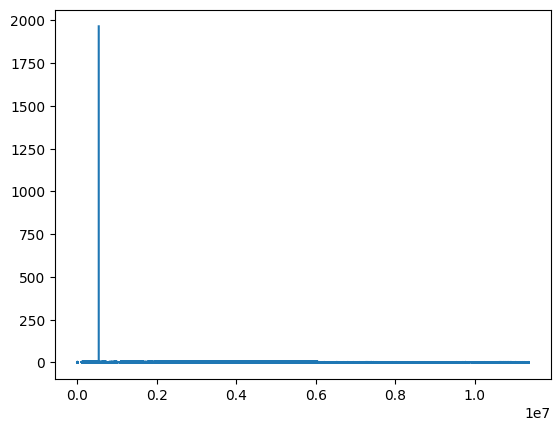

In [ ]:
combined_df_clean['Close'].plot()

In [ ]:
dup_check = combined_df_clean[['Open', 'High', 'Low', 'Close']].eq(combined_df_clean[['Open', 'High', 'Low', 'Close']].shift(-1)).all(axis=1) | \
                  combined_df_clean[['Open', 'High', 'Low', 'Close']].eq(combined_df_clean[['Open', 'High', 'Low', 'Close']].shift(1)).all(axis=1)
dup_check_df = combined_df_clean[dup_check]
dup_check_df.head(20)

,DateTime,Open,High,Low,Close,Volume,indicator
120257,2000-08-22 05:44:00,0.8990,0.8990,0.8989,0.8990,0.0,0
120260,2000-08-22 05:47:00,0.8990,0.8990,0.8989,0.8990,0.0,0
141880,2000-09-06 06:07:00,0.8830,0.8830,0.8830,0.8830,0.0,0
141883,2000-09-06 06:10:00,0.8830,0.8830,0.8830,0.8830,0.0,0
162452,2000-09-20 12:59:00,0.8479,0.8479,0.8477,0.8478,0.0,0
162456,2000-09-20 13:03:00,0.8479,0.8479,0.8477,0.8478,0.0,0
162794,2000-09-20 18:41:00,0.8498,0.8498,0.8498,0.8498,0.0,0
162797,2000-09-20 18:44:00,0.8498,0.8498,0.8498,0.8498,0.0,0
163832,2000-09-21 11:59:00,0.8560,0.8561,0.8560,0.8561,0.0,0
163839,2000-09-21 12:06:00,0.8560,0.8561,0.8560,0.8561,0.0,0


In [ ]:
# Step 2: Extract only the duplicate rows for review
dup_check_df = combined_df_clean[dup_check]

In [ ]:
# Step 3: Remove the left over duplicate OHLC rows 
final_data = combined_df_clean[~dup_check]
final_data

,DateTime,Open,High,Low,Close,Volume,indicator
0,2000-05-30 17:27:00,0.93020,0.93020,0.93020,0.93020,0.0,0
1,2000-05-30 17:28:00,NaN,NaN,NaN,NaN,NaN,1
2,2000-05-30 17:29:00,NaN,NaN,NaN,NaN,NaN,1
3,2000-05-30 17:30:00,NaN,NaN,NaN,NaN,NaN,1
4,2000-05-30 17:31:00,NaN,NaN,NaN,NaN,NaN,1
...,...,...,...,...,...,...,...
11353528,2021-12-30 23:55:00,1.13174,1.13174,1.13169,1.13169,0.0,0
11353529,2021-12-30 23:56:00,1.13170,1.13173,1.13170,1.13173,0.0,0
11353530,2021-12-30 23:57:00,1.13174,1.13174,1.13174,1.13174,0.0,0
11353531,2021-12-30 23:58:00,1.13173,1.13176,1.13173,1.13176,0.0,0


In [ ]:
dup_check = final_data[['Open', 'High', 'Low', 'Close']].eq(final_data[['Open', 'High', 'Low', 'Close']].shift(-1)).all(axis=1) | \
                  final_data[['Open', 'High', 'Low', 'Close']].eq(final_data[['Open', 'High', 'Low', 'Close']].shift(1)).all(axis=1)
dup_check_df = final_data[dup_check]
dup_check_df.head(20)

,DateTime,Open,High,Low,Close,Volume,indicator
848019,2002-01-09 15:06:00,0.8908,0.8908,0.8907,0.8907,0.0,0
848024,2002-01-09 15:11:00,0.8908,0.8908,0.8907,0.8907,0.0,0
885714,2002-02-04 19:21:00,0.8693,0.8694,0.8692,0.8694,0.0,0
885722,2002-02-04 19:29:00,0.8693,0.8694,0.8692,0.8694,0.0,0
958985,2002-03-27 16:32:00,0.8730,0.8730,0.8729,0.8729,0.0,0
958991,2002-03-27 16:38:00,0.8730,0.8730,0.8729,0.8729,0.0,0
1136966,2002-07-29 06:53:00,0.9814,0.9814,0.9813,0.9814,0.0,0
1136971,2002-07-29 06:58:00,0.9814,0.9814,0.9813,0.9814,0.0,0
1250598,2002-10-16 04:45:00,0.9810,0.9810,0.9809,0.9809,0.0,0
1250603,2002-10-16 04:50:00,0.9810,0.9810,0.9809,0.9809,0.0,0


In [ ]:
final_data

,DateTime,Open,High,Low,Close,Volume,indicator
0,2000-05-30 17:27:00,0.93020,0.93020,0.93020,0.93020,0.0,0
1,2000-05-30 17:28:00,NaN,NaN,NaN,NaN,NaN,1
2,2000-05-30 17:29:00,NaN,NaN,NaN,NaN,NaN,1
3,2000-05-30 17:30:00,NaN,NaN,NaN,NaN,NaN,1
4,2000-05-30 17:31:00,NaN,NaN,NaN,NaN,NaN,1
...,...,...,...,...,...,...,...
11353528,2021-12-30 23:55:00,1.13174,1.13174,1.13169,1.13169,0.0,0
11353529,2021-12-30 23:56:00,1.13170,1.13173,1.13170,1.13173,0.0,0
11353530,2021-12-30 23:57:00,1.13174,1.13174,1.13174,1.13174,0.0,0
11353531,2021-12-30 23:58:00,1.13173,1.13176,1.13173,1.13176,0.0,0


In [ ]:
data = final_data.copy()

In [ ]:
data['Close'].iloc[374920:374950].max()

np.float64(1.0267)

In [ ]:
data['Close'].nlargest(n=5)

537485     1965.0001
4273192       1.6038
4273193       1.6033
4273196       1.6031
4273194       1.6030
Name: Close, dtype: float64

In [ ]:
max_idx = data['Close'].idxmax()
max_idx

np.int64(537485)

In [ ]:
data.loc[max_idx, :] = np.nan

ConversionError: Failed to convert value(s) to axis units: array(['2000-05-30T17:27:00.000000000', '2000-05-30T17:28:00.000000000',
       '2000-05-30T17:29:00.000000000', ...,
       '2021-12-30T23:57:00.000000000', '2021-12-30T23:58:00.000000000',
       '2021-12-30T23:59:00.000000000'],
      shape=(5808638,), dtype='datetime64[ns]')

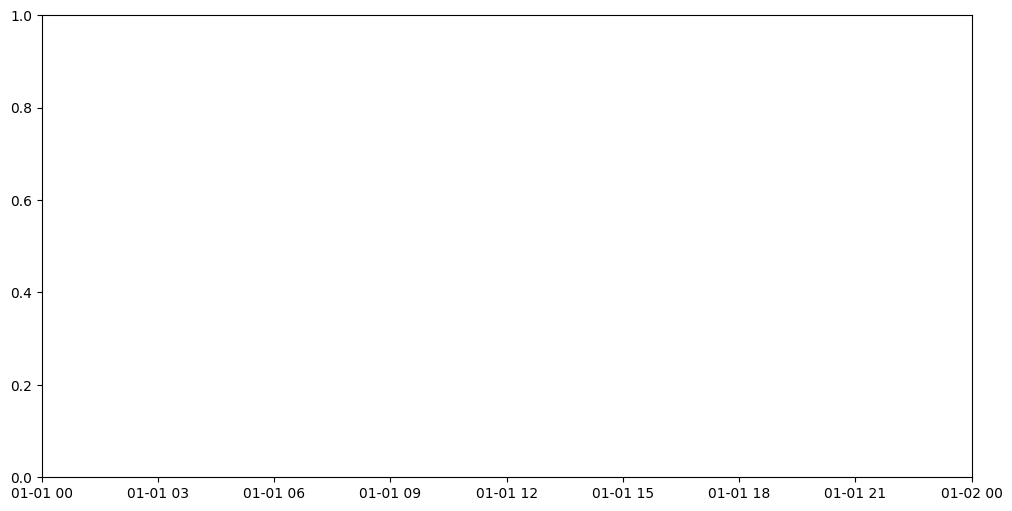

In [ ]:

# Plot the 'Close' prices
plt.figure(figsize=(12, 6))
plt.plot(data['DateTime'], data['Close'], label='Close Price', linewidth=1)

# Enhancing the plot aesthetics
plt.title('EUR/USD Close Price Over Time', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Close Price', fontsize=12)
plt.grid(alpha=0.3)
plt.legend(loc='upper left')
plt.tight_layout()

# Show the plot
plt.show()


In [ ]:
# Create a column to identify hourly groups
data['Hour'] = pd.to_datetime(data['DateTime']).dt.floor('h').dt.hour
data

,DateTime,Open,High,Low,Close,Volume,indicator,Hour
0,2000-05-30 17:27:00,0.93020,0.93020,0.93020,0.93020,0.0,0.0,17.0
1,2000-05-30 17:28:00,NaN,NaN,NaN,NaN,NaN,1.0,17.0
2,2000-05-30 17:29:00,NaN,NaN,NaN,NaN,NaN,1.0,17.0
3,2000-05-30 17:30:00,NaN,NaN,NaN,NaN,NaN,1.0,17.0
4,2000-05-30 17:31:00,NaN,NaN,NaN,NaN,NaN,1.0,17.0
...,...,...,...,...,...,...,...,...
11353528,2021-12-30 23:55:00,1.13174,1.13174,1.13169,1.13169,0.0,0.0,23.0
11353529,2021-12-30 23:56:00,1.13170,1.13173,1.13170,1.13173,0.0,0.0,23.0
11353530,2021-12-30 23:57:00,1.13174,1.13174,1.13174,1.13174,0.0,0.0,23.0
11353531,2021-12-30 23:58:00,1.13173,1.13176,1.13173,1.13176,0.0,0.0,23.0


In [ ]:
#######################################
########    CLOSE-CLOSE RVOL    #######

# Compute log returns
data['Log_Returns'] = np.log(data['Close'] / data['Close'].shift(1))

# Square the log returns
data['Squared_Returns'] = data['Log_Returns']**2

# Set 'Datetime' as the index before resampling
data = data.set_index('DateTime')  # Set 'Datetime' as index

# Resample the data to hourly groups and count the number of rows in each group
group_sizes = data['Squared_Returns'].resample('h').count() -1 # N-1
# Aggregate squared returns by hour (sum)
hourly_squared_sum = data['Squared_Returns'].resample('h').sum()
hourly_squared_sum
# Compute variance by dividing the sum by the group size
hourly_variance = hourly_squared_sum / group_sizes
hourly_variance
# Compute realized volatility as the square root of the variance
hourly_rvol = hourly_variance.apply(lambda x: x**0.5)
hourly_rvol.tail()

# Combine results into a DataFrame for easy analysis
hourly_rvol_df = pd.DataFrame({'Hourly_RVol': hourly_rvol})
hourly_rvol_df

,Hourly_RVol
DateTime,
2000-05-30 17:00:00,inf
2000-05-30 18:00:00,0.000135
2000-05-30 19:00:00,0.000225
2000-05-30 20:00:00,0.000208
2000-05-30 21:00:00,0.000152
...,...
2021-12-30 19:00:00,0.000050
2021-12-30 20:00:00,0.000054
2021-12-30 21:00:00,0.000041


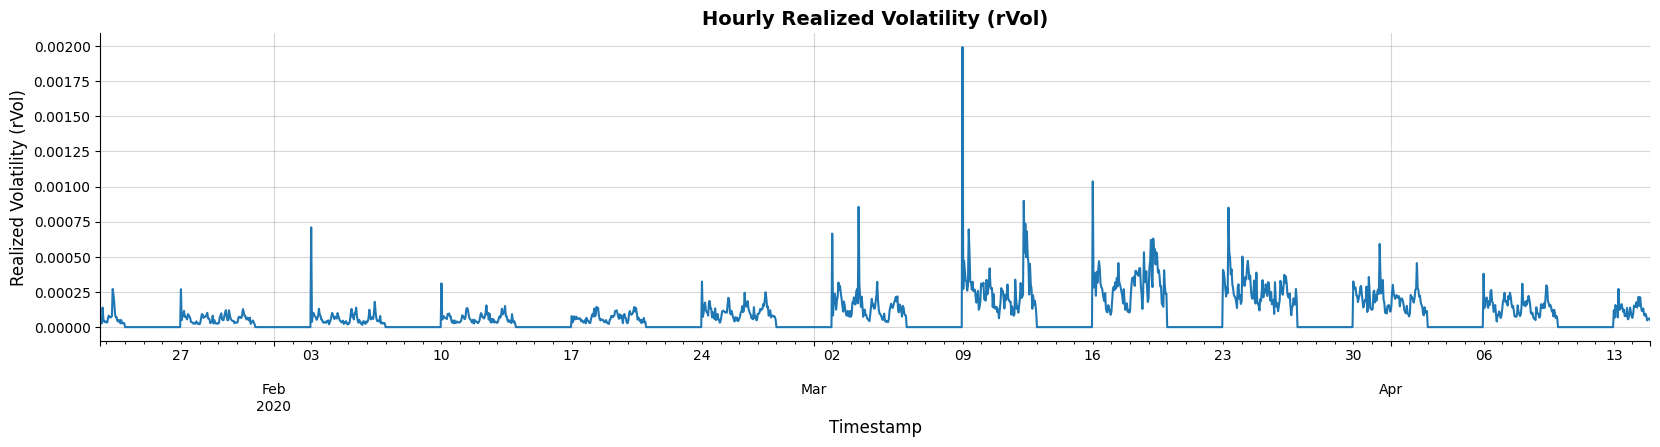

In [ ]:

hourly_rvol_df['Hourly_RVol'].iloc[-17000:-15000].plot(kind='line', figsize=(20, 4))
plt.gca().spines[['top', 'right']].set_visible(False)

plt.title("Hourly Realized Volatility (rVol)", fontsize=14, fontweight='bold')
plt.xlabel("Timestamp", fontsize=12)
plt.ylabel("Realized Volatility (rVol)", fontsize=12)
plt.grid(alpha=0.5)
plt.show()

In [ ]:
def calculate_rvol(data, vol_measure, timeframe, minute_interval):
    """
    Computes realized volatility (rVol) using a selected measure, timeframe, and minute data granularity.
    
    Parameters:
    - data (pd.DataFrame): A dataframe with 'Open', 'High', 'Low', 'Close' prices indexed by timestamp.
    - vol_measure (str): The volatility measure to use ('Garman-Klass', 'Rogers-Satchell', 'Close-to-Close').
    - timeframe (int): The time window for realized volatility (must be a multiple of 60 minutes).
    - minute_interval (int): The granularity of minute data (1, 5, 10, etc.).
    
    Returns:
    - rvol_df (pd.DataFrame): A dataframe containing the calculated realized volatility.
    """
    assert timeframe % 60 == 0, "Timeframe must be a multiple of 60 minutes."
    assert minute_interval > 0, "Minute interval must be positive."
    
    # Ensure index is datetime for resampling
    data.index = pd.to_datetime(data.index)

    # Constants
    k = 2 * np.log(2) - 1  # Constant for Garman-Klass

    # Compute volatility measures
    if vol_measure == 'Garman-Klass':
        data['V'] = 0.5 * (np.log(data['High'] / data['Low']) ** 2) - k * (np.log(data['Close'] / data['Open']) ** 2)
    elif vol_measure == 'Rogers-Satchell':
        data['V'] = (np.log(data['High'] / data['Open']) * np.log(data['High'] / data['Close']) +
                     np.log(data['Low'] / data['Open']) * np.log(data['Low'] / data['Close']))
    elif vol_measure == 'Close-to-Close':
        data['Log_Returns'] = np.log(data['Close'] / data['Close'].shift(1))
        data['V'] = data['Log_Returns'] ** 2  # Squared log returns for variance
    else:
        raise ValueError("Invalid volatility measure. Choose 'Garman-Klass', 'Rogers-Satchell', or 'Close-to-Close'.")

    # Resample based on the specified timeframe
    resample_str = f'{timeframe}T'  # 'T' stands for minutes in pandas resampling
    period_counts = data.resample(resample_str).size()  # Count of data points per timeframe
    rvol_data = data.resample(resample_str).agg({'V': 'sum'})

    # Adjust by (N-1) for sample variance
    rvol_data['V'] /= (period_counts - 1)

    # Compute realized volatility (square root of variance)
    rvol_data[f'RVol_{timeframe}min_{vol_measure}'] = np.sqrt(rvol_data['V'])

    # Final DataFrame for analysis
    rvol_df = rvol_data[[f'RVol_{timeframe}min_{vol_measure}']]
    
    
    
    
    # Plot realized volatility
    plt.figure(figsize=(12, 6))
    plt.plot(rvol_df, label=f'Realized Volatility ({vol_measure}, {timeframe} min)', color='b')
    plt.xlabel('Time')
    plt.ylabel('Realized Volatility')
    plt.title(f'Realized Volatility Over Time ({vol_measure}, {timeframe} min)')
    plt.legend()
    plt.grid(True)
    plt.show()




    return rvol_df


C:\Users\estifo\AppData\Local\Temp\ipykernel_17368\3473461342.py:37: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  period_counts = data.resample(resample_str).size()  # Count of data points per timeframe
C:\Users\estifo\AppData\Local\Temp\ipykernel_17368\3473461342.py:38: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  rvol_data = data.resample(resample_str).agg({'V': 'sum'})


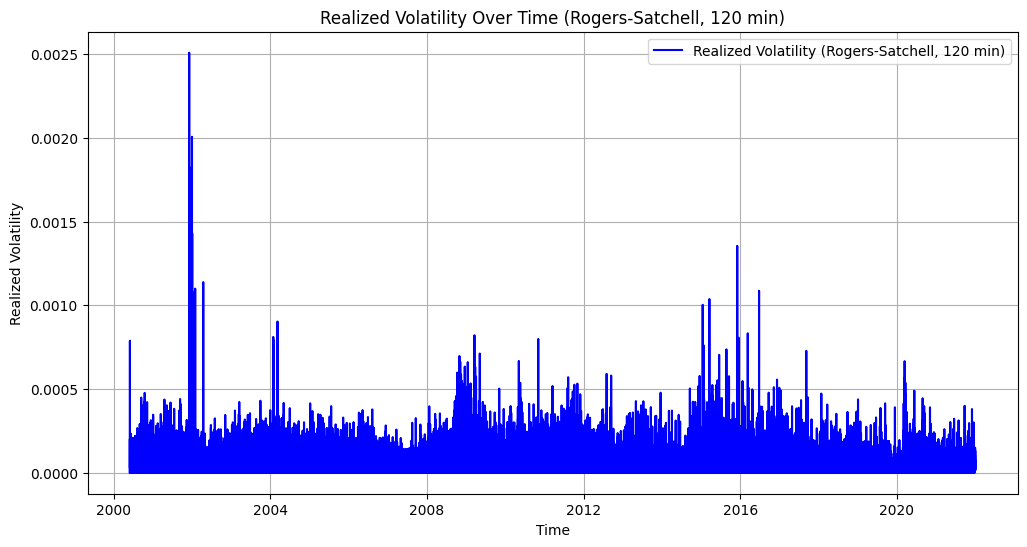

                     RVol_720min_Rogers-Satchell
DateTime                                        
2000-06-17 12:00:00                    -0.000000
2000-06-18 00:00:00                    -0.000000
2000-06-18 12:00:00                    -0.000000
2000-06-19 00:00:00                     0.000084
2000-06-19 12:00:00                     0.000058


In [ ]:
rvol_720m_rs = calculate_rvol(data, vol_measure='Rogers-Satchell', timeframe=120, minute_interval= 1)
print(rvol_120m_rs.tail())


In [ ]:
rvol_720m_rs

,RVol_120min_Rogers-Satchell
DateTime,
2000-05-30 16:00:00,0.000000
2000-05-30 18:00:00,0.000028
2000-05-30 20:00:00,0.000022
2000-05-30 22:00:00,0.000000
2000-05-31 00:00:00,0.000010
...,...
2021-12-30 14:00:00,0.000044
2021-12-30 16:00:00,0.000073
2021-12-30 18:00:00,0.000034


In [ ]:
zero_rvol_rows = rvol_720m_rs[rvol_720m_rs['RVol_120min_Rogers-Satchell'] == 0]

zero_rvol_rows.tail(20)

,RVol_120min_Rogers-Satchell
DateTime,
2021-12-25 08:00:00,-0.0
2021-12-25 10:00:00,-0.0
2021-12-25 12:00:00,-0.0
2021-12-25 14:00:00,-0.0
2021-12-25 16:00:00,-0.0
2021-12-25 18:00:00,-0.0
2021-12-25 20:00:00,-0.0
2021-12-25 22:00:00,-0.0
2021-12-26 00:00:00,-0.0


In [ ]:
V_ohlc= 0.5*(data["High"]-data["Low"])**2 -(2*np.log(2)-1)*(data["Close"]-data["Open"])**2

In [ ]:
import numpy as np
import pandas as pd

# Constants
k = 2 * np.log(2) - 1  # Constant for Garman-Klass

# Sample DataFrame (Assuming data is already available with 'High', 'Low', 'Close', and 'Open' columns)
# Ensure 'data' has a DateTimeIndex before resampling
data.index = pd.to_datetime(data.index)

# Garman-Klass Volatility Calculation
data['V_GK'] = 0.5 * (np.log(data['High'] / data['Low']) ** 2) - k * (np.log(data['Close'] / data['Open']) ** 2)

# Rogers-Satchell Volatility Calculation
data['V_RS'] = (np.log(data['High'] / data['Open']) * np.log(data['High'] / data['Close']) +
                np.log(data['Low'] / data['Open']) * np.log(data['Low'] / data['Close']))

# Close-to-Close Volatility Calculation
data['Log_Returns'] = np.log(data['Close'] / data['Close'].shift(1))
data['V_CC'] = data['Log_Returns'] ** 2  # Squared log returns for variance

# Resampling to 120-minute intervals
two_hour_counts = data.resample('2H').size()  # Number of data points per 2-hour interval (N)
two_hour_data = data.resample('2H').agg({
    'V_GK': 'sum',
    'V_RS': 'sum',
    'V_CC': 'sum'
})

# Adjust by (N-1) for sample variance
two_hour_data['V_GK'] /= (two_hour_counts - 1)
two_hour_data['V_RS'] /= (two_hour_counts - 1)
two_hour_data['V_CC'] /= (two_hour_counts - 1)

# Compute realized volatility (square root of sample variances)
two_hour_data['RVol_2H_GK'] = np.sqrt(two_hour_data['V_GK'])
two_hour_data['RVol_2H_RS'] = np.sqrt(two_hour_data['V_RS'])
two_hour_data['RVol_2H_CC'] = np.sqrt(two_hour_data['V_CC'])

# Final DataFrame for analysis
rvol_2h_df = two_hour_data[['RVol_2H_GK', 'RVol_2H_RS', 'RVol_2H_CC']]

# Display the last few rows
print(rvol_2h_df.tail())


C:\Users\estifo\AppData\Local\Temp\ipykernel_17368\1446318649.py:23: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  two_hour_counts = data.resample('2H').size()  # Number of data points per 2-hour interval (N)
C:\Users\estifo\AppData\Local\Temp\ipykernel_17368\1446318649.py:24: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  two_hour_data = data.resample('2H').agg({


                     RVol_2H_GK  RVol_2H_RS  RVol_2H_CC
DateTime                                               
2021-12-30 14:00:00    0.000046    0.000044    0.000071
2021-12-30 16:00:00    0.000064    0.000073    0.000049
2021-12-30 18:00:00    0.000035    0.000034    0.000051
2021-12-30 20:00:00    0.000027    0.000027    0.000046
2021-12-30 22:00:00    0.000017    0.000016    0.000030


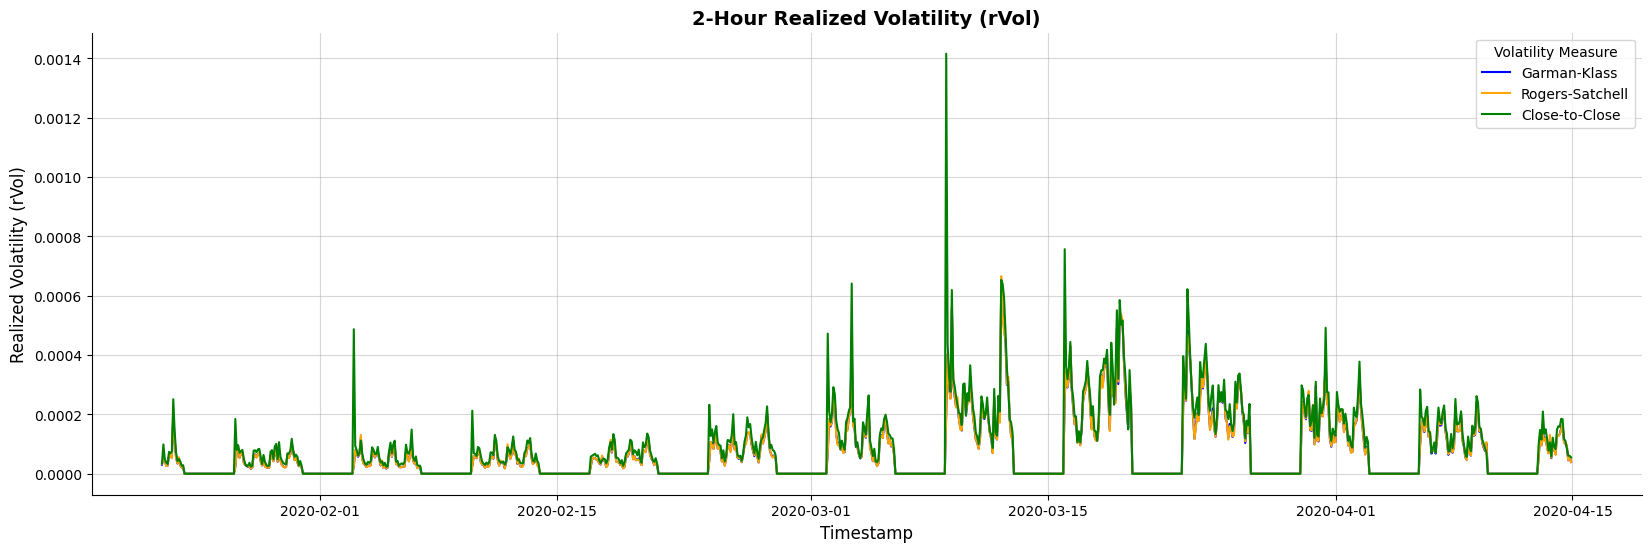

In [ ]:
# Plot the data for the specified range
plt.figure(figsize=(20, 6))

# Plot Garman-Klass
plt.plot(rvol_2h_df['RVol_2H_GK'].iloc[-8500:-7500], label='Garman-Klass', color='blue')

# Plot Rogers-Satchell
plt.plot(rvol_2h_df['RVol_2H_RS'].iloc[-8500:-7500], label='Rogers-Satchell', color='orange')

# Plot Close-to-Close
plt.plot(rvol_2h_df['RVol_2H_CC'].iloc[-8500:-7500], label='Close-to-Close', color='green')

# Customize the plot
plt.gca().spines[['top', 'right']].set_visible(False)
plt.title("2-Hour Realized Volatility (rVol)", fontsize=14, fontweight='bold')
plt.xlabel("Timestamp", fontsize=12)
plt.ylabel("Realized Volatility (rVol)", fontsize=12)
plt.grid(alpha=0.5)

# Add legend
plt.legend(title="Volatility Measure", fontsize=10)

# Show the plot
plt.show()


In [ ]:


# Constants
k = 2 * np.log(2) - 1  # Constant for Garman-Klass

# Garman-Klass 1-Minute RVOL
data['RVOL_GK_1min'] = np.sqrt(0.5 * (np.log(data['High'] / data['Low']) ** 2) -
                          k * (np.log(data['Close'] / data['Open']) ** 2))

# Rogers-Satchell 1-Minute RVOL
data['RVOL_RS_1min'] = np.sqrt(np.log(data['High'] / data['Open']) * np.log(data['High'] / data['Close']) +
                          np.log(data['Low'] / data['Open']) * np.log(data['Low'] / data['Close']))

# Close-to-Close 1-Minute RVOL
data['Log_Returns'] = np.log(data['Close'] / data['Close'].shift(1))
data['RVOL_CC_1min'] = np.sqrt(data['Log_Returns'] ** 2)

# Display the last few rows
print(data[['Open', 'High', 'Low', 'Close','RVOL_GK_1min', 'RVOL_RS_1min', 'RVOL_CC_1min']].tail())


                        Open     High      Low    Close  RVOL_GK_1min  \
DateTime                                                                
2021-12-30 23:55:00  1.13174  1.13174  1.13169  1.13169      0.000015   
2021-12-30 23:56:00  1.13170  1.13173  1.13170  1.13173      0.000009   
2021-12-30 23:57:00  1.13174  1.13174  1.13174  1.13174      0.000000   
2021-12-30 23:58:00  1.13173  1.13176  1.13173  1.13176      0.000009   
2021-12-30 23:59:00  1.13174  1.13174  1.13174  1.13174      0.000000   

                     RVOL_RS_1min  RVOL_CC_1min  
DateTime                                         
2021-12-30 23:55:00           0.0      0.000044  
2021-12-30 23:56:00           0.0      0.000035  
2021-12-30 23:57:00           0.0      0.000009  
2021-12-30 23:58:00           0.0      0.000018  
2021-12-30 23:59:00           0.0      0.000018  


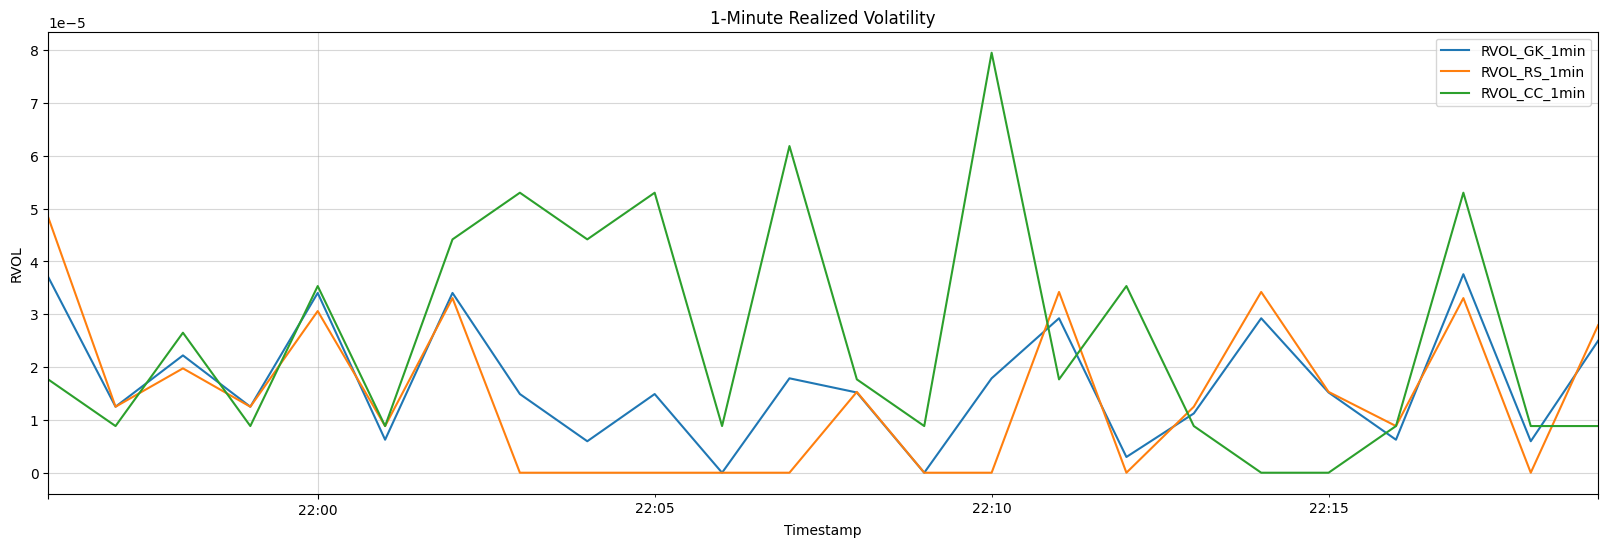

In [ ]:
data[['RVOL_GK_1min', 'RVOL_RS_1min', 'RVOL_CC_1min']].iloc[-124:-100].plot(figsize=(20, 6), title="1-Minute Realized Volatility")
plt.grid(alpha=0.5)
plt.xlabel("Timestamp")
plt.ylabel("RVOL")
plt.show()


In [ ]:
# Resample 1-minute data into 5-minute OHLC data
data_5min = data.resample('5T').agg({
    'Open': 'first',
    'High': 'max',
    'Low': 'min',
    'Close': 'last'
}).dropna()  # Drop intervals with missing data


C:\Users\estifo\AppData\Local\Temp\ipykernel_17368\2101537248.py:2: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  data_5min = data.resample('5T').agg({


In [ ]:

# Constants
k = 2 * np.log(2) - 1  # Constant for Garman-Klass

# Garman-Klass Variance Calculation
data_5min['V_GK'] = 0.5 * (np.log(data_5min['High'] / data_5min['Low']) ** 2) - \
                    k * (np.log(data_5min['Close'] / data_5min['Open']) ** 2)

# Rogers-Satchell Variance Calculation
data_5min['V_RS'] = (np.log(data_5min['High'] / data_5min['Open']) * np.log(data_5min['High'] / data_5min['Close']) +
                     np.log(data_5min['Low'] / data_5min['Open']) * np.log(data_5min['Low'] / data_5min['Close']))

# Close-to-Close Variance Calculation
data_5min['Log_Returns'] = np.log(data_5min['Close'] / data_5min['Close'].shift(1))
data_5min['V_CC'] = data_5min['Log_Returns'] ** 2

# Resample to 360-minute intervals (6 hours)
interval = '360T'  # 360 minutes
rvol_360min_data = data_5min.resample(interval).agg({
    'V_GK': 'sum',
    'V_RS': 'sum',
    'V_CC': 'sum',
    'Log_Returns': 'size'  # Count number of 5-min intervals (N)
})

# Adjust by (N-1) for sample variance
rvol_360min_data['V_GK'] /= (rvol_360min_data['Log_Returns'] - 1)
rvol_360min_data['V_RS'] /= (rvol_360min_data['Log_Returns'] - 1)
rvol_360min_data['V_CC'] /= (rvol_360min_data['Log_Returns'] - 1)

# Compute realized volatility (square root of adjusted variances)
rvol_360min_data['RVOL_360min_GK'] = np.sqrt(rvol_360min_data['V_GK'])
rvol_360min_data['RVOL_360min_RS'] = np.sqrt(rvol_360min_data['V_RS'])
rvol_360min_data['RVOL_360min_CC'] = np.sqrt(rvol_360min_data['V_CC'])

# Final DataFrame for analysis
rvol_360min_df = rvol_360min_data[['RVOL_360min_GK', 'RVOL_360min_RS', 'RVOL_360min_CC']]

# Display the last few rows
print(rvol_360min_df.tail())

c:\Users\estifo\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\estifo\AppData\Local\Temp\ipykernel_17368\1934478563.py:18: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  rvol_360min_data = data_5min.resample(interval).agg({


                     RVOL_360min_GK  RVOL_360min_RS  RVOL_360min_CC
DateTime                                                           
2021-12-29 18:00:00        0.000101        0.000101        0.000137
2021-12-30 00:00:00        0.000169        0.000171        0.000178
2021-12-30 06:00:00        0.000308        0.000295        0.000410
2021-12-30 12:00:00        0.000141        0.000139        0.000174
2021-12-30 18:00:00        0.000079        0.000076        0.000101


In [ ]:
from datetime import datetime
# Reset the index to make 'Datetime' a regular column
data = data.reset_index()

# Now perform the join
data = data.join(hourly_rvol_df, on=pd.to_datetime(data['DateTime']).dt.floor('H'))

C:\Users\estifo\AppData\Local\Temp\ipykernel_17368\955193813.py:6: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  data = data.join(hourly_rvol_df, on=pd.to_datetime(data['DateTime']).dt.floor('H'))


In [ ]:
from datetime import datetime

# Reset the index to make 'Datetime' a regular column
data = data.reset_index()

# Create a common join key column for hourly_rvol_df
data['JoinKey_Hourly'] = pd.to_datetime(data['DateTime']).dt.floor('H')
hourly_rvol_df['JoinKey_Hourly'] = hourly_rvol_df.index

# Create a common join key column for rvol_360min_df
data['JoinKey_360min'] = pd.to_datetime(data['DateTime']).dt.floor('360T')
rvol_360min_df['JoinKey_360min'] = rvol_360min_df.index

# Now perform the join using the common 'JoinKey' columns
data = data.merge(hourly_rvol_df, on='JoinKey_Hourly', how='left').merge(rvol_360min_df, on='JoinKey_360min', how='left')

# Optionally, drop the 'JoinKey' columns if not needed
data = data.drop(columns=['JoinKey_Hourly', 'JoinKey_360min'])

# Set 'Datetime' back as the index
# data = data.set_index('Datetime')  # Set 'Datetime' as index (Optional)

C:\Users\estifo\AppData\Local\Temp\ipykernel_17368\886688232.py:7: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  data['JoinKey_Hourly'] = pd.to_datetime(data['DateTime']).dt.floor('H')
C:\Users\estifo\AppData\Local\Temp\ipykernel_17368\886688232.py:11: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  data['JoinKey_360min'] = pd.to_datetime(data['DateTime']).dt.floor('360T')
C:\Users\estifo\AppData\Local\Temp\ipykernel_17368\886688232.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rvol_360min_df['JoinKey_360min'] = rvol_360min_df.index


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6326501 entries, 0 to 6326500
Data columns (total 24 columns):
 #   Column           Dtype         
---  ------           -----         
 0   index            int64         
 1   key_0            datetime64[ns]
 2   DateTime         datetime64[ns]
 3   Open             float64       
 4   High             float64       
 5   Low              float64       
 6   Close            float64       
 7   Volume           float64       
 8   indicator        float64       
 9   Hour             float64       
 10  Log_Returns      float64       
 11  Squared_Returns  float64       
 12  V                float64       
 13  V_GK             float64       
 14  V_RS             float64       
 15  V_CC             float64       
 16  RVOL_GK_1min     float64       
 17  RVOL_RS_1min     float64       
 18  RVOL_CC_1min     float64       
 19  Hourly_RVol_x    float64       
 20  Hourly_RVol_y    float64       
 21  RVOL_360min_GK   float64       

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6326501 entries, 0 to 6326500
Data columns (total 24 columns):
 #   Column           Dtype         
---  ------           -----         
 0   index            int64         
 1   key_0            datetime64[ns]
 2   DateTime         datetime64[ns]
 3   Open             float64       
 4   High             float64       
 5   Low              float64       
 6   Close            float64       
 7   Volume           float64       
 8   indicator        float64       
 9   Hour             float64       
 10  Log_Returns      float64       
 11  Squared_Returns  float64       
 12  V                float64       
 13  V_GK             float64       
 14  V_RS             float64       
 15  V_CC             float64       
 16  RVOL_GK_1min     float64       
 17  RVOL_RS_1min     float64       
 18  RVOL_CC_1min     float64       
 19  Hourly_RVol_x    float64       
 20  Hourly_RVol_y    float64       
 21  RVOL_360min_GK   float64       

In [ ]:
# Reset the index to a DatetimeIndex if needed
data = data.set_index('DateTime')

In [ ]:
data[['Open','High', 'Low', 'Close','RVOL_360min_GK']].iloc[-300:-250]

,Open,High,Low,Close,RVOL_360min_GK
DateTime,,,,,
2021-12-30 18:54:00,1.13236,1.13236,1.13235,1.13235,0.000079
2021-12-30 18:55:00,1.13236,1.13236,1.13233,1.13233,0.000079
2021-12-30 18:56:00,1.13233,1.13234,1.13220,1.13221,0.000079
2021-12-30 18:57:00,1.13221,1.13221,1.13217,1.13220,0.000079
2021-12-30 18:58:00,1.13220,1.13229,1.13217,1.13217,0.000079
2021-12-30 18:59:00,1.13218,1.13226,1.13217,1.13222,0.000079
2021-12-30 19:00:00,1.13219,1.13226,1.13214,1.13226,0.000079
2021-12-30 19:01:00,1.13222,1.13222,1.13216,1.13218,0.000079
2021-12-30 19:02:00,1.13218,1.13218,1.13218,1.13218,0.000079
